In [1]:
import numpy as np 
import sigma
import librosa
from matplotlib import pyplot as plt 

import tensorflow as tf 
from tensorflow.keras import models, layers 

import os 
from tqdm import tqdm 

In [2]:
speech_path = "Dataset/Speech"
egg_path = "Dataset/EGG"
trim_size = 16384

model_path = "models/Checkpoint_150_150"

model = models.load_model(model_path)

In [3]:
def load_paths():

    speech = os.listdir(speech_path)
    egg = os.listdir(egg_path)
    names = [i for i in tqdm(speech, ascii = True, desc = "Loading Filepaths", ncols = 100) if i in egg]
    return names

def load_random_sample():
    names = load_paths()
    rand_idx = np.random.randint(0, len(names))
    input_signal = librosa.load(os.path.join(speech_path, names[rand_idx]))[0]
    target_signal = librosa.load(os.path.join(egg_path, names[rand_idx]))[0]
    l = len(input_signal)
    lim = l - trim_size
    low = np.random.randint(0, lim)
    high = low + trim_size 
    input_signal = input_signal[low:high]
    target_signal = target_signal[low:high]
    model_inp = np.expand_dims(input_signal, -1)
    model_targ = model.predict(np.expand_dims(model_inp, 0))[0]
    model_targ = model_targ.ravel()
    # print(model_targ.shape)
    # input_signal = np.expand_dims(input_signal, -1)
    # target_signal = np.expand_dims(target_signal, -1)
    return input_signal, target_signal, model_targ
    


In [4]:
inp, targ, model_targ = load_random_sample()

Loading Filepaths: 100%|#####################################| 3377/3377 [00:00<00:00, 45334.61it/s]


In [5]:
gci_true, goi_true = sigma.get_glottal(targ, sr_egg = 16384)
gci_pred, goi_pred = sigma.get_glottal(model_targ, sr_egg = 16384)

/home/harish/Documents/Python Scripts/SAP Project/Glottal-Instants-Extraction/sigma.py:20: RuntimeWarning: invalid value encountered in true_divide
  group_delay[i] = np.real(X_r/X)
/home/harish/Documents/Python Scripts/SAP Project/Glottal-Instants-Extraction/sigma.py:20: RuntimeWarning: invalid value encountered in true_divide
  group_delay[i] = np.real(X_r/X)


In [22]:
def plot(egg,speech,gci,goi, trim = None, title = "Plot"):
    # window_start = 0
    # window_length = 16384
    
    gci_plot = np.zeros(len(egg))
    goi_plot = np.zeros(len(egg))

    gci_plot[gci] = 0.025
    goi_plot[goi] = -0.025

    plt.figure(figsize = (20, 20))
    
    # plt.plot(speech[window_start:window_start+window_length])
    plt.subplot(411)
    plt.plot(speech[:trim])
    plt.title('Speech signal', fontsize = 20)
    # plt.show()
    # plt.plot(egg[window_start:window_start+window_length])
    plt.subplot(412)
    plt.plot(egg[:trim])
    plt.title('EGG', fontsize = 20)
    # plt.show()
    # plt.plot(egg[window_start+1:window_start+window_length+1] - egg[window_start:window_start+window_length])
    plt.subplot(413)
    plt.plot(np.diff(egg)[:trim])
    plt.plot(gci_plot[:trim])
    plt.title('dEGG GCI', fontsize = 20)
    # plt.show()
    # plt.plot(gci_plot[window_start:window_start+window_length],label='gci')
    plt.subplot(414)
    plt.plot(np.diff(egg)[:trim])
    plt.plot(goi_plot[:trim])
    # plt.plot(goi_plot[window_start:window_start+window_length],label='goi')
    # plt.plot(goi_plot[:trim], label = 'goi')
    plt.title('dEGG GOI', fontsize = 20)
    # plt.legend()

    plt.subplots_adjust(top = 0.92)
    plt.suptitle(title, fontsize = 30)
    plt.show()

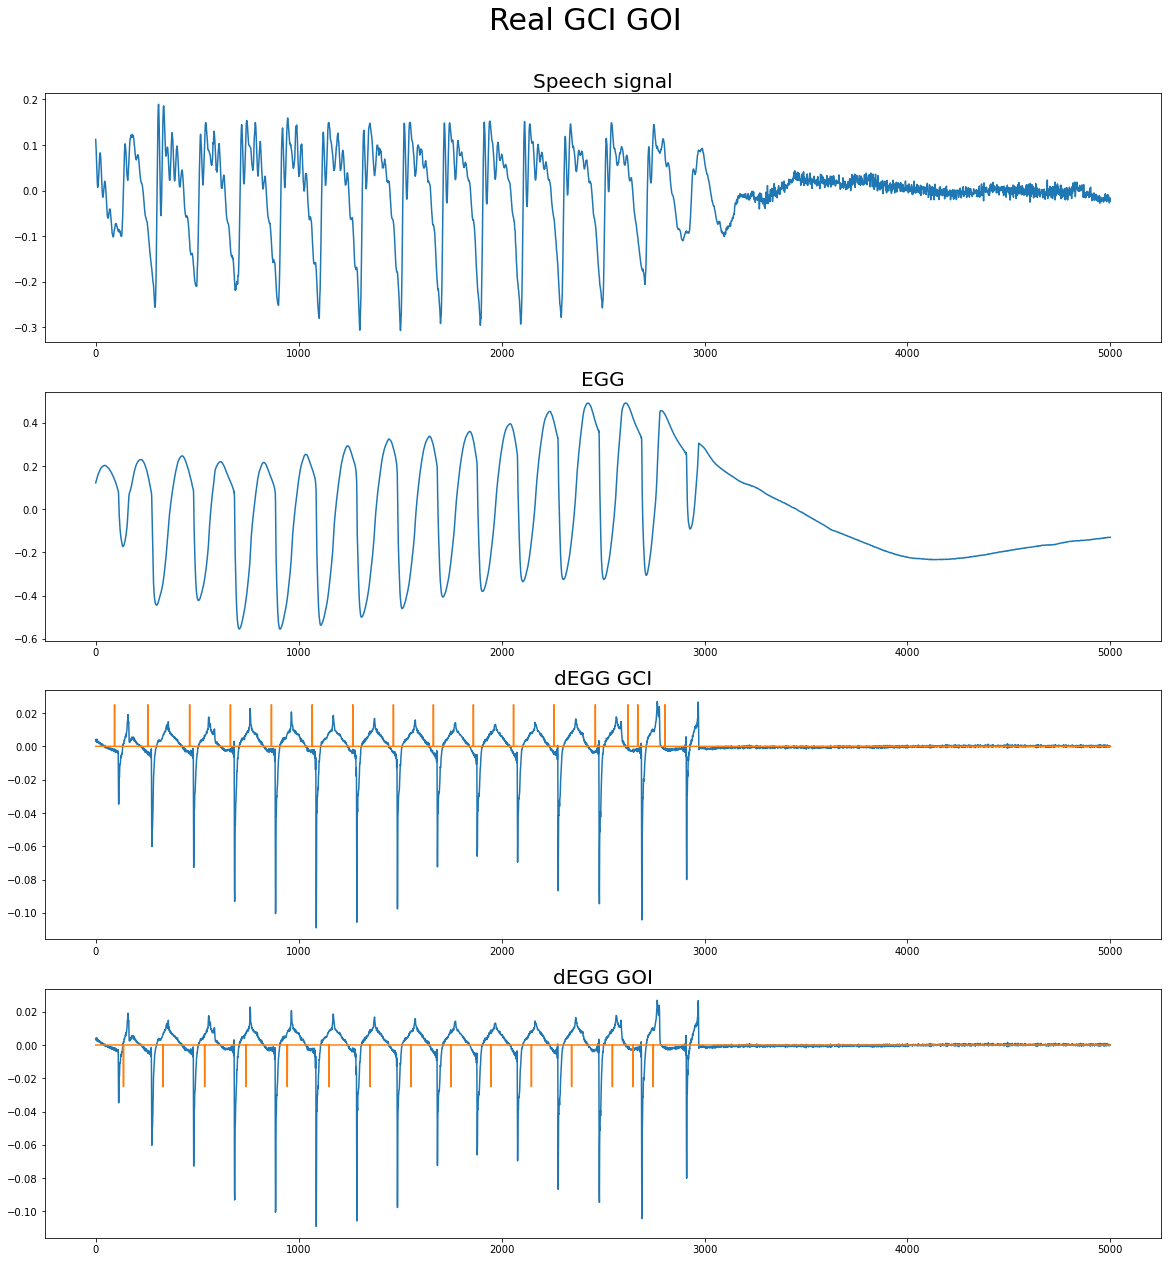

In [23]:
plot(targ, inp, gci_true, goi_true, trim = 5000, title = "Real GCI GOI")

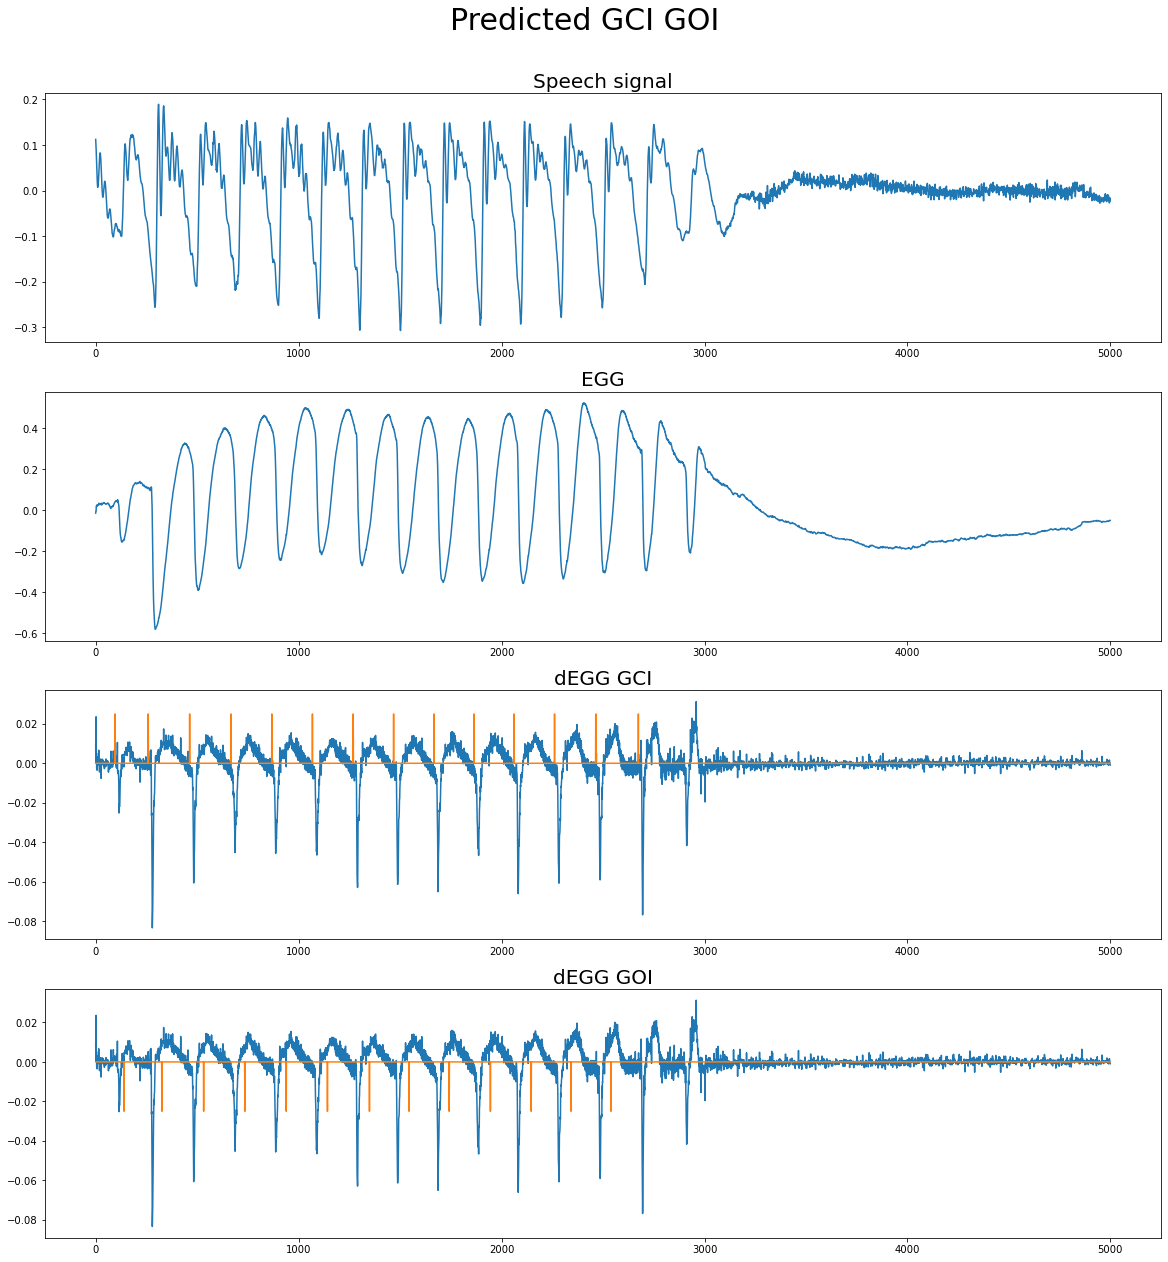

In [24]:
plot(model_targ, inp, gci_pred, goi_pred, trim = 5000, title = "Predicted GCI GOI")